<a href="https://colab.research.google.com/github/jullymaellylima/data_science/blob/master/Analisando_os_Dados_do_Airbnb_Londres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Londres*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Londres, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados utilizados neste *notebook* foram extraídos do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Logo abaixo está o arquivo obtido para realização da primeira análise exploratória:

* `listings.csv` - *Summary information and metrics for listings in London (good for visualisations).* 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("http://data.insideairbnb.com/united-kingdom/england/london/2020-05-10/visualisations/listings.csv")

## Análise dos Dados

Etapa cujo função é estabelecer uma consciência situacional inicial, fornecendo um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Vamos verificar as 5 primeiras entradas e posteriormente iniciar nossas análises.

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,21,2020-02-22,0.18,3,361
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,10,89,2020-03-16,0.70,1,256
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,300,3,42,2019-11-02,0.38,15,330
3,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,360
4,25023,All-comforts 2-bed flat near Wimbledon tennis,102813,Amanda,NaN,Wandsworth,51.44687,-0.21874,Entire home/apt,65,21,35,2020-03-30,0.69,1,42


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Na página do Airbnb existem as versões de *dataset* mais completa e uma mais resumida - que é a utilizada aqui. 

In [4]:
print(f'Entradas:\t{df.shape[0]}')
print(f'Variáveis:\t{df.shape[1]}\n')

display(df.dtypes)


Entradas:	85207
Variáveis:	16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [5]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.251599
last_review                       0.251599
host_name                         0.000329
name                              0.000282
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Histograma para visualizar a distribuição das variáveis.

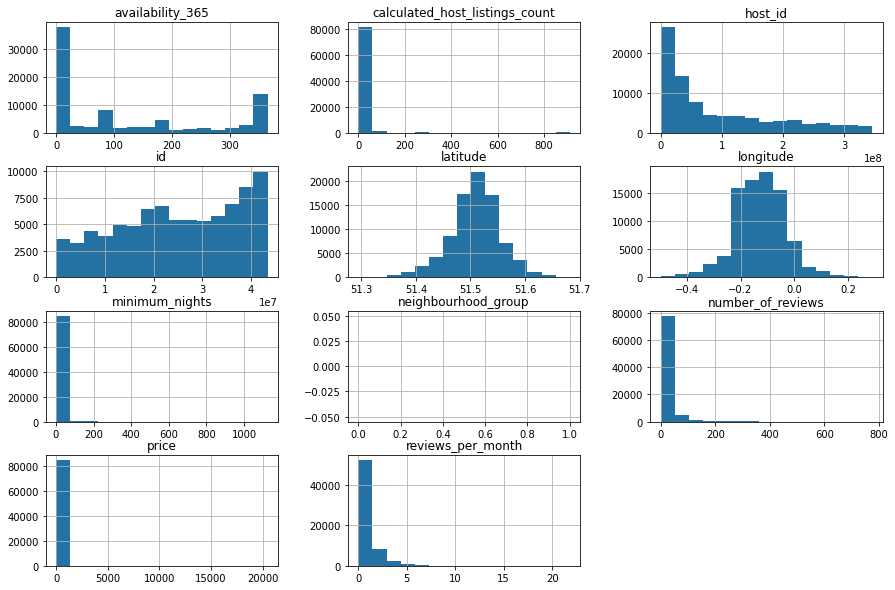

In [9]:
df.hist(bins=15, figsize=(15,10), facecolor='#2471A3');




### **Q4. Há *outliers* presentes?**

De acordo com a distribuição do histrograma, há indícios de haver *outliers* presentes. Isso fica claro quando analisamos as variáreis `price`, `minimum_nights` e `calculated_host_listings_count`, onde os valores não seguem uma distribuição e a representação gráfica fica distorcida.

Para confirmação da presença de *outliers*, pode-se realizar duas ações:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots`para a variável.

In [12]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,85207.000000,85207.000000,85207.000000,63769.000000,85207.000000,85207.000000
mean,128.951800,4.593437,17.284179,0.877056,20.224477,122.478975
std,306.939736,19.667718,37.170766,1.090839,98.070548,139.290122
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,46.000000,1.000000,0.000000,0.180000,1.000000,0.000000
50%,81.000000,2.000000,4.000000,0.500000,1.000000,74.000000
75%,140.000000,3.000000,17.000000,1.150000,5.000000,251.000000
max,20471.000000,1125.000000,775.000000,21.810000,910.000000,365.000000


Analisando o resumo estaístico acima, podemos concluir que:

* A variável `price` possui 75% do valor abaixo de 140, porém seu valor máximo é de 20471.
* A quantidade mínima de noites - `minimum_nights` - está acima de 365 dias no ano.


####Regra 1.5 x IQR (Interquartile Range)

Uma regra desenvolvida por estatísticos e que é bastante utilizada para para identificar os limites e apontar os *outliers* de determinados dados é a regra 1.5 x IQR, onde um dado é considerado *outlier* quando é maior que 1.5 x IQR acima do terceiro quartil (Q3) ou abaixo do primeiro quartil (Q1), sendo IQR a diferença entre o terceiro e o primeiro quartil.  

#### Boxplot para price

In [13]:
Q1 = df['price'].quantile(q = 0.25)
Q3 = df['price'].quantile(q = 0.75)
IQR = Q3-Q1

lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

print(lower)
print(upper)

-95.0
281.0


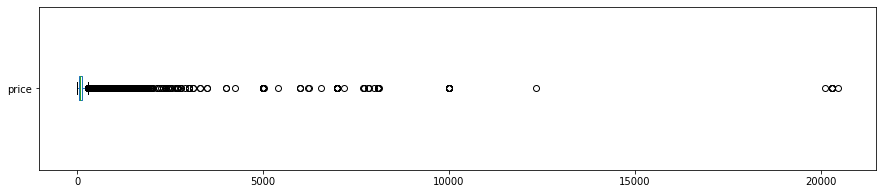


price: valores acima de 281
6076 entradas
7.1309%


In [14]:
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print('\nprice: valores acima de 281')
print(f'{(len(df[df.price > 281]))} entradas')
print(f'{((len(df[df.price > 281])/df.shape[0])*100):.4f}%')

#### Boxplot para minimum_nights

In [15]:
Q1 = df['minimum_nights'].quantile(q = 0.25)
Q3 = df['minimum_nights'].quantile(q = 0.75)
IQR = Q3-Q1

lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

print(lower)
print(upper)

-2.0
6.0


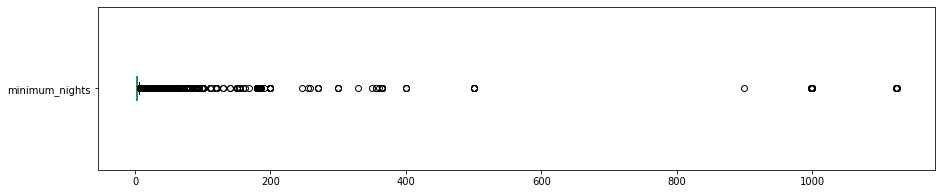


minimum_nights: valores acima de 6:
9067 entradas
10.6411%


In [16]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

print('\nminimum_nights: valores acima de 6:')
print(f'{(len(df[df.minimum_nights > 6]))} entradas')
print(f'{((len(df[df.minimum_nights>6])/df.shape[0])*100):.4f}%')

#### Histogramas sem *outliers*

Vamos plotar novamente o histograma, porém com o *DataFrame* limpo - sem os *outliers* nas variáveis `price` e `minimum_nights`.

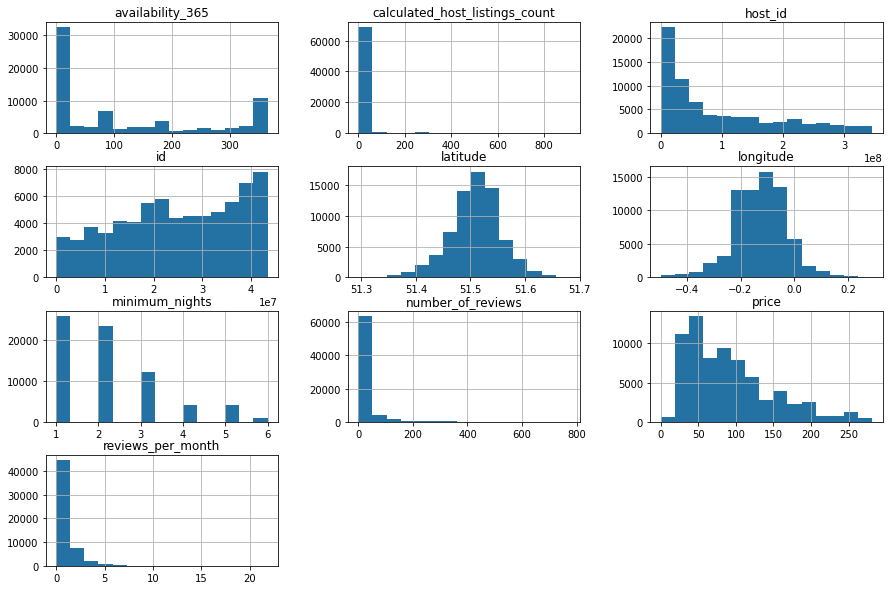

In [17]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 281].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 6].index, axis=0, inplace=True)

df_clean.drop('neighbourhood_group', axis=1, inplace=True)

df_clean.hist(bins=15, figsize=(15, 10), facecolor='#2471A3');

### **Q4. Qual a média dos preços de aluguel?**

Após retirados os *outliers* - que atrapalhariam a compreensão do que é usual nos valores das reservas -, vamos verificar qual a média dos preços dos aluguéis.

In [29]:
df_clean.price.mean()
round(df_clean.price.mean(),2)


90.23

### **Q4. Qual a correlação existente entre as variáveis**

In [19]:
corr= df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.186397,-0.083117,-0.076251,0.162775,0.103159
minimum_nights,0.186397,1.000000,-0.082906,-0.209409,0.050146,-0.091990
number_of_reviews,-0.083117,-0.082906,1.000000,0.722162,-0.039239,0.132615
reviews_per_month,-0.076251,-0.209409,0.722162,1.000000,-0.019399,0.148871
calculated_host_listings_count,0.162775,0.050146,-0.039239,-0.019399,1.000000,0.065270
availability_365,0.103159,-0.091990,0.132615,0.148871,0.065270,1.000000


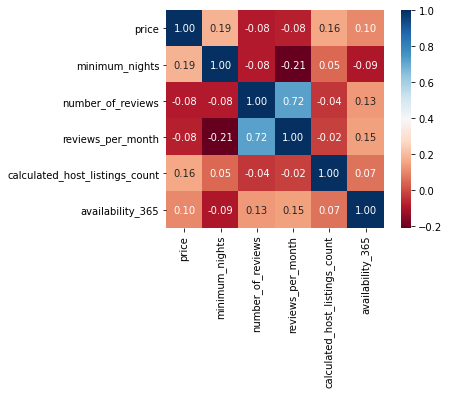

In [20]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Quem já utilizou o site do AirBnb para se hospedar em algum lugar, sabe que existem várias opções de acomodação - casas inteiras, apenas um quarto, quarto compartilhado. A coluna da variável `room_type`indica os tipos de locação disponíveis e, com ela - e o método `value_counts()`-, vamos verificar a quantidade de ocorrências para cada tipo de reserva.

In [21]:
df_clean.room_type.value_counts()


Entire home/apt    37467
Private room       32291
Shared room          560
Hotel room           517
Name: room_type, dtype: int64

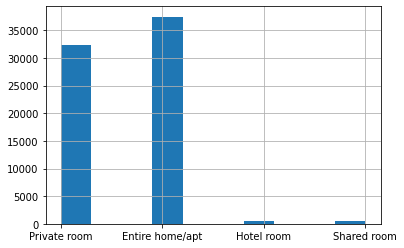

In [30]:
df_clean.room_type.hist()

In [23]:
df_clean.room_type.value_counts() / df_clean.shape[0]


Entire home/apt    0.528933
Private room       0.455862
Shared room        0.007906
Hotel room         0.007299
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Londres?**

Agora vamos comparar os preços por bairros (*neighbourhoods*), utilizando o `groupby()`, que verifica uma variável em função de outra. 

In [24]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
City of London            140.972727
Kensington and Chelsea    132.198783
Westminster               123.957027
Camden                    108.693823
Hammersmith and Fulham     97.496656
Islington                  94.899045
Richmond upon Thames       93.527040
Wandsworth                 91.033248
Southwark                  88.672835
Lambeth                    84.404848
Name: price, dtype: float64

Fazendo uso dos dados a respeito da Latitude e Longitude dos imóveis, é possível plotar um gráfico sobre a densidade de locações na cidade. É considerado `x=longitude` e `y=latitude`.

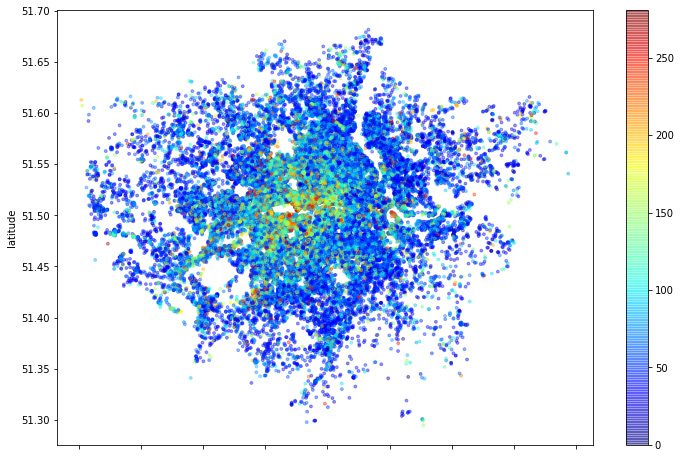

In [25]:
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Retirados os *outliers*, que apontavam números muito acima da normalidade, vamos verificar qual a média do número mínimo de noites estabelecido pelos proprietários dos imóveis alugados. 

In [ ]:
df.minimum_nights.mean()
round(df.minimum_nights.mean())

5

## Conclusões

Após uma análise superficial, foi possivel verificar a existência de *outliers* em algumas variaveis, que foram retirados para aproximar a visualização dos dados à realidade.

É possível observar também, por meio do gráfico de densidade das locações, que os imóveis com estadia mais cara estão localizados no centro de Londres.

Ademais, importante ressaltar que essa análise foi realizada usando uma versão resumida disponível e o pretendido e realizá-la novamente, usando a base de dados mais completa.